# IDS 690 - Practical Data Science

### Instructor: Dr. Nick Eubank

### Student: Derek Wales

## Mid Semester Report Preliminary analysis

In [1]:
#Added thing
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import pyarrow
import pyarrow.parquet
import patsy
from plotnine import *
import math
import warnings
warnings.filterwarnings('ignore', module='plotnine')

## Endstate:
### Analyzing overdose deaths in Florida (Policy change in 2010) and Georgia and Alabama (No policy change)

In [2]:
complete_df = pd.read_csv('C:\\Users\\derek\\Desktop\\MIDS 1st Semester\\Practical Data Science\\_Projects\Project One\\estimating-impact-of-opioid-prescription-regulations-team-4\\20_intermediate_files\\ultimate_final_frame_v2.csv')

In [3]:
complete_df.head()

,Unnamed: 0,Year,FIPS,County,Morphine_equ,State,Deaths,Year_Changed,Population,Deaths_PC
0,0,2006.0,13001.0,APPLING,3996.843779,GA,NaN,NaN,17725.0,NaN
1,1,2006.0,13003.0,ATKINSON,1375.483686,GA,NaN,NaN,8197.0,NaN
2,2,2006.0,13005.0,BACON,4586.778211,GA,NaN,NaN,10682.0,NaN
3,3,2006.0,13007.0,BAKER,9.651600,GA,NaN,NaN,3877.0,NaN
4,4,2006.0,13009.0,BALDWIN,11069.705010,GA,NaN,NaN,46513.0,NaN


In [4]:
# Can possibly give another state as a control 
complete_df['State'].unique()

array(['GA', 'FL', 'AL', 'AZ', 'CA', 'ID', 'MO', 'MS', 'NM', 'OR', 'TX',
       'WA'], dtype=object)

### Questions
#### 1) Volume of Opioids Rx
#### 2) Drug overdose deaths
#### Doing a Pre/Post and Dif/Dif analysis

### Starting by
#### Building dataframe with only FL, and then doing pre and post on opiod deaths

In [5]:
complete_df.head()

,Unnamed: 0,Year,FIPS,County,Morphine_equ,State,Deaths,Year_Changed,Population,Deaths_PC
0,0,2006.0,13001.0,APPLING,3996.843779,GA,NaN,NaN,17725.0,NaN
1,1,2006.0,13003.0,ATKINSON,1375.483686,GA,NaN,NaN,8197.0,NaN
2,2,2006.0,13005.0,BACON,4586.778211,GA,NaN,NaN,10682.0,NaN
3,3,2006.0,13007.0,BAKER,9.651600,GA,NaN,NaN,3877.0,NaN
4,4,2006.0,13009.0,BALDWIN,11069.705010,GA,NaN,NaN,46513.0,NaN


In [6]:
florida_df = complete_df.loc[complete_df['State']=='FL']
florida_df.describe()

,Unnamed: 0,Year,FIPS,Morphine_equ,Deaths,Year_Changed,Population,Deaths_PC
count,679.000000,679.000000,469.000000,4.660000e+02,458.000000,0.0,4.690000e+02,248.000000
mean,2462.430044,2009.064801,12067.910448,1.908764e+05,70.652838,NaN,2.758425e+05,0.000159
std,2365.653112,3.277515,38.436712,3.832258e+05,73.035464,NaN,4.357790e+05,0.000067
min,1063.000000,2003.000000,12001.000000,6.284498e+02,10.000000,NaN,7.811000e+03,0.000046
25%,1232.500000,2007.000000,12035.000000,9.681981e+03,17.250000,NaN,2.769000e+04,0.000109
50%,1402.000000,2009.000000,12069.000000,5.427818e+04,37.000000,NaN,9.880700e+04,0.000152
75%,2013.500000,2012.000000,12101.000000,1.787059e+05,102.750000,NaN,3.130110e+05,0.000203
max,9612.000000,2015.000000,12133.000000,3.026737e+06,326.000000,NaN,2.512219e+06,0.000379


In [7]:
florida_df['Year_Changed'].unique()

array([nan])

In [8]:
florida_df['Year_Changed'] = 2010
del florida_df['Unnamed: 0']
florida_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Year,FIPS,County,Morphine_equ,State,Deaths,Year_Changed,Population,Deaths_PC
1063,2006.0,12001.0,ALACHUA,82596.618688,FL,NaN,2010,239506.0,NaN
1064,2006.0,12003.0,BAKER,11900.178638,FL,NaN,2010,25571.0,NaN
1065,2006.0,12005.0,BAY,61998.102472,FL,34.0,2010,165644.0,0.000205
1066,2006.0,12007.0,BRADFORD,13424.830895,FL,NaN,2010,28506.0,NaN
1067,2006.0,12009.0,BREVARD,201186.153403,FL,107.0,2010,535138.0,0.000200


#### Plan - Plot opiod deaths per capita pre 2010 and after 2010
#### Use a groupby to get total deaths per year and plot

In [9]:
florida_df['Year'].unique()

array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2003., 2004.,
       2005., 2013., 2014., 2015.])

In [10]:
florida_df_grouped = florida_df.groupby(['Year', 'FIPS', 'County', 'State','Deaths_PC'], as_index = False)
florida_df_grouped1 = florida_df_grouped.sum()
florida_df_grouped1.head()

,Year,FIPS,County,State,Deaths_PC,Morphine_equ,Deaths,Year_Changed,Population
0,2006.0,12005.0,BAY,FL,0.000205,6.199810e+04,34.0,2010,165644.0
1,2006.0,12009.0,BREVARD,FL,0.000200,2.011862e+05,107.0,2010,535138.0
2,2006.0,12011.0,BROWARD,FL,0.000162,1.222607e+06,282.0,2010,1739348.0
3,2006.0,12015.0,CHARLOTTE,FL,0.000095,8.212360e+04,15.0,2010,157099.0
4,2006.0,12017.0,CITRUS,FL,0.000167,4.964689e+04,23.0,2010,137826.0


In [11]:
florida_df_grouped1.sample(10)

,Year,FIPS,County,State,Deaths_PC,Morphine_equ,Deaths,Year_Changed,Population
144,2010.0,12021.0,COLLIER,FL,0.000114,2.376638e+05,36.0,2010,316931.0
202,2011.0,12103.0,PINELLAS,FL,0.000266,1.262520e+06,244.0,2010,916806.0
60,2007.0,12103.0,PINELLAS,FL,0.000256,6.363363e+05,235.0,2010,918624.0
78,2008.0,12033.0,ESCAMBIA,FL,0.000094,1.161368e+05,28.0,2010,296854.0
143,2010.0,12019.0,CLAY,FL,0.000107,1.449967e+05,20.0,2010,186076.0
51,2007.0,12085.0,MARTIN,FL,0.000188,7.709787e+04,27.0,2010,143542.0
164,2010.0,12103.0,PINELLAS,FL,0.000309,1.438059e+06,284.0,2010,918263.0
55,2007.0,12091.0,OKALOOSA,FL,0.000159,5.194869e+04,29.0,2010,182677.0
140,2010.0,12011.0,BROWARD,FL,0.000151,3.026737e+06,262.0,2010,1734139.0
88,2008.0,12086.0,MIAMI-DADE,FL,0.000061,5.195368e+05,149.0,2010,2436062.0


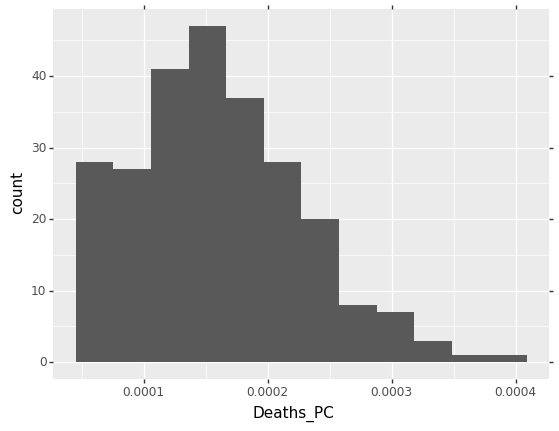

<ggplot: (162359889472)>

In [12]:
# Distribution of deaths per capita
(ggplot(florida_df_grouped1,aes('Deaths_PC')) + geom_histogram()
)

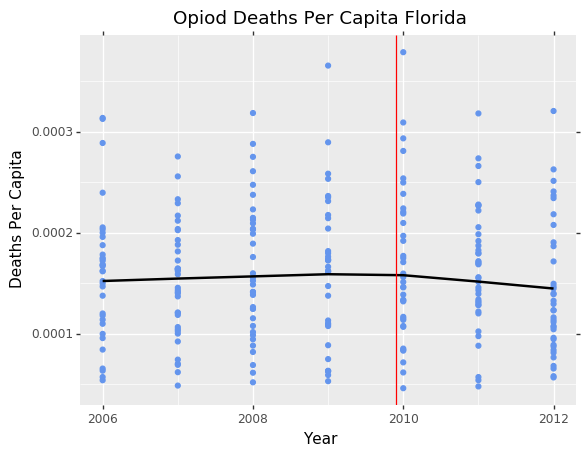

<ggplot: (-9223371874494638185)>

In [13]:
(ggplot(florida_df_grouped1, aes(x='Year', y= 'Deaths_PC')) +
        geom_point(color = 'cornflowerblue') + geom_smooth(method = 'lowess') +  geom_vline(xintercept=2009.9, color = 'red') + ylab('Deaths Per Capita') + ggtitle('Opiod Deaths Per Capita Florida')
)

#### Suggests a downward trend, building a linear model to confirm.

In [14]:
# Created a Policy Change Variable 
florida_df_grouped1['Policy_Change'] = [1 if x >= 2010 else 0 for x in florida_df_grouped1['Year']]
florida_df_grouped1.sample(10)

,Year,FIPS,County,State,Deaths_PC,Morphine_equ,Deaths,Year_Changed,Population,Policy_Change
57,2007.0,12097.0,OSCEOLA,FL,0.000102,6.409523e+04,26.0,2010,253722.0,0
239,2012.0,12101.0,PASCO,FL,0.000234,3.456322e+05,109.0,2010,465276.0,1
229,2012.0,12081.0,MANATEE,FL,0.000123,2.192997e+05,40.0,2010,324834.0,1
52,2007.0,12086.0,MIAMI-DADE,FL,0.000062,3.734959e+05,149.0,2010,2415576.0,0
225,2012.0,12061.0,INDIAN RIVER,FL,0.000123,9.892332e+04,17.0,2010,138203.0,1
131,2009.0,12109.0,SAINT JOHNS,FL,0.000063,7.531217e+04,11.0,2010,174994.0,0
127,2009.0,12099.0,PALM BEACH,FL,0.000218,1.813925e+06,276.0,2010,1268601.0,0
210,2011.0,12127.0,VOLUSIA,FL,0.000179,3.963230e+05,89.0,2010,496089.0,1
19,2006.0,12091.0,OKALOOSA,FL,0.000147,5.176888e+04,27.0,2010,184071.0,0
165,2010.0,12105.0,POLK,FL,0.000146,2.857120e+05,86.0,2010,590116.0,1


In [15]:
florida_df_grouped1['Year'].unique()

array([2006., 2007., 2008., 2009., 2010., 2011., 2012.])

In [16]:
florida_model_df = florida_df_grouped1
del florida_model_df['Year_Changed']

In [17]:
florida_model_df = florida_model_df.rename(columns={'Policy Change':'Policy_Change'})
florida_model_df.head()

,Year,FIPS,County,State,Deaths_PC,Morphine_equ,Deaths,Population,Policy_Change
0,2006.0,12005.0,BAY,FL,0.000205,6.199810e+04,34.0,165644.0,0
1,2006.0,12009.0,BREVARD,FL,0.000200,2.011862e+05,107.0,535138.0,0
2,2006.0,12011.0,BROWARD,FL,0.000162,1.222607e+06,282.0,1739348.0,0
3,2006.0,12015.0,CHARLOTTE,FL,0.000095,8.212360e+04,15.0,157099.0,0
4,2006.0,12017.0,CITRUS,FL,0.000167,4.964689e+04,23.0,137826.0,0


### Building the Pre/Post Model

In [18]:
# Leaving all of the countys in, this does not have a Deaths/Policy Change Interaction

pre_post_model = smf.ols('Deaths_PC ~ C(Year) + C(County) + Policy_Change + Morphine_equ + Population', data = florida_model_df).fit()
print(pre_post_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Deaths_PC   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     20.01
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           2.65e-54
Time:                        09:32:44   Log-Likelihood:                 2253.9
No. Observations:                 248   AIC:                            -4408.
Df Residuals:                     198   BIC:                            -4232.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### Included Policy Change Interaction Term

In [19]:
# Leaving all of the countys in (Model Validation?) Need to ask some clairifying questions
# Deaths_PC*Policy_Change
pre_post_model2 = smf.ols('Deaths_PC ~ C(Year) + C(County) + Policy_Change + Morphine_equ + C(Year):Policy_Change', data = florida_model_df).fit()
print(pre_post_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              Deaths_PC   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     20.53
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           5.81e-55
Time:                        09:32:44   Log-Likelihood:                 2253.9
No. Observations:                 248   AIC:                            -4410.
Df Residuals:                     199   BIC:                            -4238.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

#### Model interpretation: There is a no negative sign on the policy change/when it took effect. In fact it almost looks like the slope of the line in Florida went down almost entirely because of whatever happened in 2012.

### Building the Difference and Difference Model

In [20]:
complete_df_1 = complete_df
del complete_df_1['Unnamed: 0']
complete_df_1.head()

,Year,FIPS,County,Morphine_equ,State,Deaths,Year_Changed,Population,Deaths_PC
0,2006.0,13001.0,APPLING,3996.843779,GA,NaN,NaN,17725.0,NaN
1,2006.0,13003.0,ATKINSON,1375.483686,GA,NaN,NaN,8197.0,NaN
2,2006.0,13005.0,BACON,4586.778211,GA,NaN,NaN,10682.0,NaN
3,2006.0,13007.0,BAKER,9.651600,GA,NaN,NaN,3877.0,NaN
4,2006.0,13009.0,BALDWIN,11069.705010,GA,NaN,NaN,46513.0,NaN


In [21]:
complete_df_1['State'].unique()

array(['GA', 'FL', 'AL', 'AZ', 'CA', 'ID', 'MO', 'MS', 'NM', 'OR', 'TX',
       'WA'], dtype=object)

In [22]:
ga_al_df = complete_df_1.loc[(complete_df_1['State'] == 'AL')|
                            (complete_df_1['State'] == 'GA')]
ga_al_df.head()

,Year,FIPS,County,Morphine_equ,State,Deaths,Year_Changed,Population,Deaths_PC
0,2006.0,13001.0,APPLING,3996.843779,GA,NaN,NaN,17725.0,NaN
1,2006.0,13003.0,ATKINSON,1375.483686,GA,NaN,NaN,8197.0,NaN
2,2006.0,13005.0,BACON,4586.778211,GA,NaN,NaN,10682.0,NaN
3,2006.0,13007.0,BAKER,9.651600,GA,NaN,NaN,3877.0,NaN
4,2006.0,13009.0,BALDWIN,11069.705010,GA,NaN,NaN,46513.0,NaN


In [23]:
ga_al_df['State'].unique()

array(['GA', 'AL'], dtype=object)

In [24]:
#Plot the two states together, then see if you can make some inferences
ga_al_df.head()

,Year,FIPS,County,Morphine_equ,State,Deaths,Year_Changed,Population,Deaths_PC
0,2006.0,13001.0,APPLING,3996.843779,GA,NaN,NaN,17725.0,NaN
1,2006.0,13003.0,ATKINSON,1375.483686,GA,NaN,NaN,8197.0,NaN
2,2006.0,13005.0,BACON,4586.778211,GA,NaN,NaN,10682.0,NaN
3,2006.0,13007.0,BAKER,9.651600,GA,NaN,NaN,3877.0,NaN
4,2006.0,13009.0,BALDWIN,11069.705010,GA,NaN,NaN,46513.0,NaN


In [25]:
ga_al_grouped = ga_al_df.groupby(['Year', 'FIPS', 'County', 'State','Deaths_PC'], as_index = False)
ga_al_grouped1 = ga_al_grouped.sum()
ga_al_grouped1.head()

,Year,FIPS,County,State,Deaths_PC,Morphine_equ,Deaths,Year_Changed,Population
0,2006.0,1003.0,BALDWIN,AL,0.000065,0.0,11.0,0.0,168121.0
1,2006.0,1021.0,CHILTON,AL,0.000307,0.0,13.0,0.0,42318.0
2,2006.0,1073.0,JEFFERSON,AL,0.000131,0.0,86.0,0.0,655893.0
3,2006.0,1097.0,MOBILE,AL,0.000082,0.0,33.0,0.0,402916.0
4,2006.0,1101.0,MONTGOMERY,AL,0.000053,0.0,12.0,0.0,227291.0


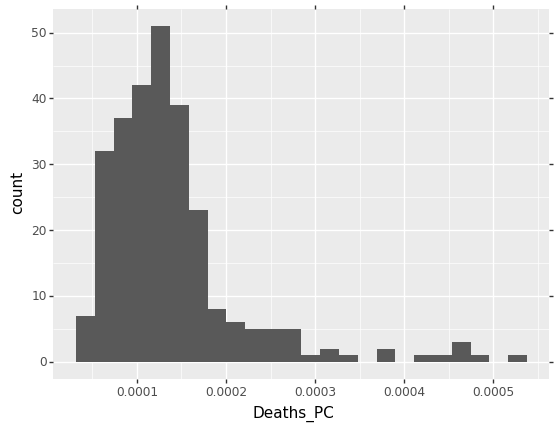

<ggplot: (162360215949)>

In [26]:
# Histogram of AL/GA
(ggplot(ga_al_grouped1,aes('Deaths_PC')) + geom_histogram()
)

### Plot with AL/GA w/Trendline from FL

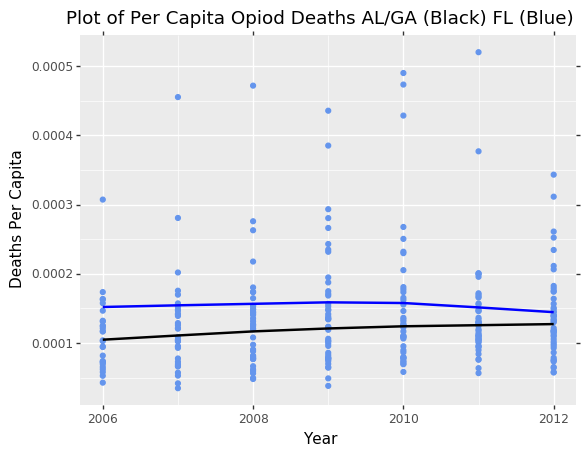

<ggplot: (162360237618)>

In [27]:
(ggplot(ga_al_grouped1, aes(x='Year', y= 'Deaths_PC')) +
        geom_point(color = 'cornflowerblue') + geom_smooth(method = 'lowess') + ylab('Deaths Per Capita') + ggtitle('Plot of Per Capita Opiod Deaths AL/GA (Black) FL (Blue)') +
        geom_smooth(data=florida_model_df, method='lowess', color ='blue', se=False)
)

### Plot seems to suggest that FL, AL, and GA were all going up and something in Florida around the year 2010 did have an effect 

### Doing difference and difference analysis
#### Plan put GA/FL/AL into one DF, and have an indicator variable for the year and whether or not the policy change took place 

In [28]:
complete_df_1['State'].unique()

array(['GA', 'FL', 'AL', 'AZ', 'CA', 'ID', 'MO', 'MS', 'NM', 'OR', 'TX',
       'WA'], dtype=object)

In [29]:
fl_ga_al_df = complete_df_1.loc[(complete_df_1['State'] == 'AL')|
                             (complete_df_1['State'] == 'GA')|
                             (complete_df_1['State'] == 'FL')]
fl_ga_al_df.head()

,Year,FIPS,County,Morphine_equ,State,Deaths,Year_Changed,Population,Deaths_PC
0,2006.0,13001.0,APPLING,3996.843779,GA,NaN,NaN,17725.0,NaN
1,2006.0,13003.0,ATKINSON,1375.483686,GA,NaN,NaN,8197.0,NaN
2,2006.0,13005.0,BACON,4586.778211,GA,NaN,NaN,10682.0,NaN
3,2006.0,13007.0,BAKER,9.651600,GA,NaN,NaN,3877.0,NaN
4,2006.0,13009.0,BALDWIN,11069.705010,GA,NaN,NaN,46513.0,NaN


In [30]:
fl_ga_al_df['Policy_Change'] = np.nan
fl_ga_al_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Year,FIPS,County,Morphine_equ,State,Deaths,Year_Changed,Population,Deaths_PC,Policy_Change
0,2006.0,13001.0,APPLING,3996.843779,GA,NaN,NaN,17725.0,NaN,NaN
1,2006.0,13003.0,ATKINSON,1375.483686,GA,NaN,NaN,8197.0,NaN,NaN
2,2006.0,13005.0,BACON,4586.778211,GA,NaN,NaN,10682.0,NaN,NaN
3,2006.0,13007.0,BAKER,9.651600,GA,NaN,NaN,3877.0,NaN,NaN
4,2006.0,13009.0,BALDWIN,11069.705010,GA,NaN,NaN,46513.0,NaN,NaN


In [31]:
fl_ga_al_df['Policy_Change'] = [1 if x == 'FL' else 0 for x in fl_ga_al_df['State']]
fl_ga_al_df.sample(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Year,FIPS,County,Morphine_equ,State,Deaths,Year_Changed,Population,Deaths_PC,Policy_Change
1233,2008.0,12081.0,MANATEE,196741.843150,FL,45.0,NaN,318766.0,0.000141,1
4024,2010.0,1119.0,SUMTER,NaN,AL,NaN,NaN,13871.0,NaN,0
1463,2012.0,12003.0,BAKER,21659.461650,FL,NaN,NaN,27010.0,NaN,1
856,2011.0,13205.0,MITCHELL,5685.760898,GA,NaN,NaN,23677.0,NaN,0
48,2006.0,13103.0,EFFINGHAM,6862.471809,GA,NaN,NaN,47823.0,NaN,0
4009,2010.0,1071.0,JACKSON,NaN,AL,NaN,NaN,53386.0,NaN,0
2607,2010.0,1117.0,SHELBY,NaN,AL,15.0,NaN,187880.0,0.000080,0
853,2011.0,13197.0,MARION,488.851815,GA,NaN,NaN,8536.0,NaN,0
900,2011.0,13297.0,WALTON,51893.525445,GA,NaN,NaN,83003.0,NaN,0
692,2010.0,13177.0,LEE,1697.757863,GA,NaN,NaN,27998.0,NaN,0


In [32]:
fl_ga_al_df['Policy_Change'] = [1 if x > 2009 else 0 for x in fl_ga_al_df['Year']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
fl_ga_al_df.head(5)

,Year,FIPS,County,Morphine_equ,State,Deaths,Year_Changed,Population,Deaths_PC,Policy_Change
0,2006.0,13001.0,APPLING,3996.843779,GA,NaN,NaN,17725.0,NaN,0
1,2006.0,13003.0,ATKINSON,1375.483686,GA,NaN,NaN,8197.0,NaN,0
2,2006.0,13005.0,BACON,4586.778211,GA,NaN,NaN,10682.0,NaN,0
3,2006.0,13007.0,BAKER,9.651600,GA,NaN,NaN,3877.0,NaN,0
4,2006.0,13009.0,BALDWIN,11069.705010,GA,NaN,NaN,46513.0,NaN,0


#### Dataframe with FL, AL, and GA wtih the correct state and policy change labeled
#### Going to use this for the dif/dif model discussed in class

In [34]:
ols = smf.ols('Deaths_PC ~ C(Policy_Change) * C(Year) + State + Morphine_equ', fl_ga_al_df).fit()
ols.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Deaths_PC   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.437
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           0.000767
Time:                        09:32:45   Log-Likelihood:                 3363.2
No. Observations:                 412   AIC:                            -6708.
Df Residuals:                     403   BIC:                            -6672.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                8.096e-05   2.67e-06     30.337      0.000    7.57e-05    8.62e-05
C(Policy_Change)[T.1]                    1.382e-05   3.46e-06      3.994      0.000    7.02e-06    2.06e-05
C(Year)[T.2004.0]                       -1.129e-20   1.98e-21     -5.694      0.000   -1.52e-20   -7.39e-21
C(Year)[T.2005.0]                         2.76e-21    1.3e-21      2.120      0.035       2e-22    5.32e-21
C(Year)[T.2006.0]                        1.312e-05   8.52e-06      1.541      0.124   -3.62e-06    2.99e-05
C(Year)[T.2007.0]                        1.246e-05   8.19e-06      1.522      0.129   -3.64e-06    2.86e-05
C(Year)[T.2008.0]                        1.698e-05   8.13e-06      2.089      0.037    9.98e-07     3.3e-05
C(Year)[T.2009.0]                        2.458e-05   8.24e-06      2.983      0.003    8.38e-06    4.08e-05
C(Year)[T.2010.0]                        1.041e-05    3.9e-06      2.669      0.008    2.74e-06    1.81e-05
C(Year)[T.2011.0]                        5.083e-06    3.7e-06      1.375      0.170   -2.18e-06    1.23e-05
C(Year)[T.2012.0]                       -1.673e-06   3.68e-06     -0.454      0.650   -8.92e-06    5.57e-06
C(Year)[T.2013.0]                                0          0        nan        nan           0           0
C(Year)[T.2014.0]                                0          0        nan        nan           0           0
C(Year)[T.2015.0]                                0          0        nan        nan           0           0
State[T.FL]                              5.127e-05   3.94e-06     13.007      0.000    4.35e-05     5.9e-05
State[T.GA]                              2.969e-05   4.03e-06      7.376      0.000    2.18e-05    3.76e-05
C(Policy_Change)[T.1]:C(Year)[T.2004.0]          0          0        nan        nan           0           0
C(Policy_Change)[T.1]:C(Year)[T.2005.0]          0          0        nan        nan           0           0
C(Policy_Change)[T.1]:C(Year)[T.2006.0]          0          0        nan        nan           0           0
C(Policy_Change)[T.1]:C(Year)[T.2007.0]          0          0        nan        nan           0           0
C(Policy_Change)[T.1]:C(Year)[T.2008.0]          0          0        nan        nan           0           0
C(Policy_Change)[T.1]:C(Year)[T.2009.0]          0          0        nan        nan           0           0
C(Policy_Change)[T.1]:C(Year)[T.2010.0]  1.041e-05    3.9e-06      2.669      0.008    2.74e-06    1.81e-05
C(Policy_Change)[T.1]:C(Year)[T.2011.0]  5.083e-06    3.7e-06      1.375      0.170   -2.18e-06    1.23e-05
C(Policy_Change)[T.1]:C(Year)[T.2012.0] -1.673e-06   3.68e-06     -0.454      0.650   -8.92e-06    5.57e-06
C(Policy_Change)[T.1]:C(Year)[T.2013.0]          0         

### It didn't flip the sign, in 2010 but it looks like 2012 it did. I think that the policy probably takes about 2 years to start seeing the effects. 